# EECS 491: Probabilistic Graphical Models Assignment 1

## Problem Description
Let there exist an urn containing $N$ balls. In this urn, $m$ of the $N$ balls are white and the other $N-m$ of the $N$ balls are black. Suppose that a sample of size $n$ is to be chosen randomly (without replacement) from the urn. If we let $X$ denote the number of white balls selected, we examine the probability that $X=i$ white balls are selected, given that $i=0,1,...,n$.

## Probability Analysis
The probability that $X=i$ white balls are selected, given that $i=0,1,...,n$ follows a hypergeometric probability distribution. Thus, the probability that $X=i$ is as follows:
$$P\{X=i\mid n,m,N\}=\frac{\binom{m}{i}\binom{N-m}{n-i}}{\binom{N}{n}}\quad i=0,1,...,n$$
Here it is clear that $P\{X=i\}$ is dependent on the unknown values of $N$ and $m$ (not $n$ because we know how much we sample for each trial). Let us simplify the problem down to one unknown parameter instead of two.

Now, suppose that we know the number of balls that were in the urn before we begin our trials. Thus, $N$ is a known quantity $N=N'$. We now wish to find
$$P\{X=i\mid n,m\}=\frac{\binom{m}{i}\binom{N'-m}{n-i}}{\binom{N'}{n}}\quad i=0,1,...,n$$
where $N'$ is some constant and $n$ is a known parameter, so m is the only unknown parameter in the problem.

## Simulation
Data for this problem would be generated by taking trials of varying sample size $n$ with $N'$ being a known fixed quantity and setting $n$ to different values. I shall conduct trials for several different values of $n$ with $N'=10000$ and an example hidden parameter $m=2500$ to generate a few probability distributions for $$P\{X=i\mid n,m=2500\}=\frac{\binom{2500}{i}\binom{7500}{n-i}}{\binom{10000}{n}}\quad i=0,1,...,n$$

In [25]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt

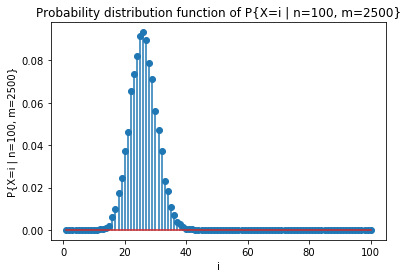

In [70]:
# n = 100
trials = 10000
total = 10000
m = 2500
n = 100
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
    p[count] += 1
p /= trials
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of P{X=i | n=100, m=2500}")
plt.xlabel("i")
plt.ylabel("P{X=i | n=100, m=2500}")
plt.show()

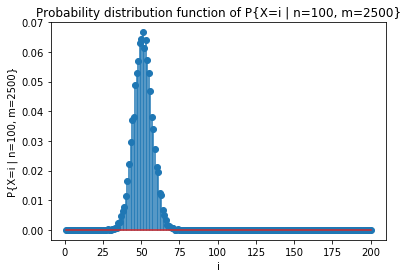

In [72]:
# n = 200
trials = 10000
total = 10000
m = 2500
n = 200
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
    p[count] += 1
p /= trials
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of P{X=i | n=100, m=2500}")
plt.xlabel("i")
plt.ylabel("P{X=i | n=100, m=2500}")
plt.show()

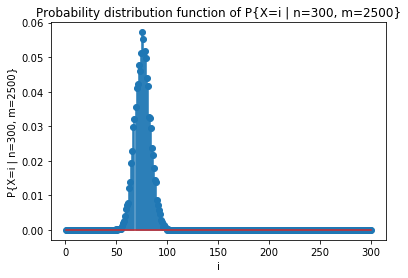

In [71]:
# n = 300
trials = 10000
total = 10000
m = 2500
n = 300
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
    p[count] += 1
p /= trials
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of P{X=i | n=%i, m=%i}" % (n,m))
plt.xlabel("i")
plt.ylabel("P{X=i | n=%i, m=%i}" % (n,m))
plt.show()